In [ ]:
from glob import glob
import matplotlib.pyplot as plt
import matplotlib.animation as animation

from pathlib import Path
import seaborn as sns
import pandas as pd
import scipy.io
import cv2
import os
import numpy as np
plt.rcParams["animation.html"] = "html5"
%matplotlib inline

In [ ]:
data_dir = os.path.join('.','data','*/')
files = glob(data_dir,recursive=True)
print(files)
data_counts = {f:sorted(glob(os.path.join(f,'*/'))) for f in files}
for key,val in data_counts.items():
    print(f"{key} : {len(val)}")

['./data/valClips/', './data/trainClips/', './data/testClips/']
./data/valClips/ : 2230
./data/trainClips/ : 7770
./data/testClips/ : 3270


In [20]:
mat_file_name = os.path.join('.','data','q3_2_data.mat')
mat = scipy.io.loadmat(mat_file_name)

In [21]:
mat_keys = list(mat.keys())
train_labels = mat[mat_keys[-2]].reshape(-1,)
val_labels = mat[mat_keys[-1]].reshape(-1,)

In [22]:
train_fnames_label = {'name':data_counts[files[1]],'labels':train_labels,'f_name':list(map(lambda x: Path(x).stem, data_counts[files[1]]))}
val_fnames_label = {'name':data_counts[files[0]],'labels':val_labels,'f_name':list(map(lambda x: Path(x).stem, data_counts[files[0]]))}
test_fnames_label = {'name':data_counts[files[2]],'f_name':list(map(lambda x: Path(x).stem, data_counts[files[2]]))}

In [23]:
df_train = pd.DataFrame(data=train_fnames_label, columns=['name','labels','f_name'])
df_val = pd.DataFrame(data=val_fnames_label, columns=['name','labels','f_name'])
df_test = pd.DataFrame(data=test_fnames_label, columns=['name','labels','f_name'])

In [24]:
categories = [Path(f).stem for f in files]
category_counts = [len(data_counts[f]) for f in files]
ax = sns.barplot(x=categories,y=category_counts)
ax.bar_label(ax.containers[0])
ax.set(title="Split Distribution")

[Text(0.5, 1.0, 'Split Distribution')]

In [27]:
ax = sns.countplot(x="labels",data=df_train)
ax.bar_label(ax.containers[0])
ax.set(title="Train Label Distribution")

[Text(0.5, 1.0, 'Train Label Distribution')]

In [26]:
ax = sns.countplot(x="labels",data=df_val)
ax.bar_label(ax.containers[0])
ax.set(title="Val Label Distribution")

[Text(0.5, 1.0, 'Val Label Distribution')]

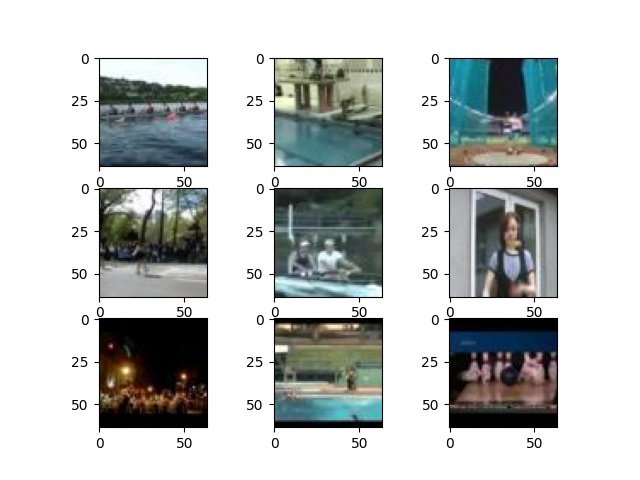

In [28]:
%matplotlib widget
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from IPython.display import Image as Ima
from PIL import Image as Im

df.loc['labels'==1]
idxs = np.random.randint(0,len(df_train),size=9)
fig, ax = plt.subplots(3,3)

video_folders = [f"{df_train['name'][i]}*" for i in idxs]
imgs = [sorted(glob(v)) for v in video_folders]

# for idx,i in enumerate(idxs):
#     # x = np.arange(0, 2*np.pi, 0.01)
#     img = Im.open(imgs[0])
#     im= ax[idx//3][idx%3].imshow(img)

ims = [ax[i//3,i%3].imshow(Im.open(imgs[i][0])) for i in range(9)]
def init():
    for k in range(9):
        img = Im.open(imgs[k][0])
        ims[k].set_data(img)
    return ims,

def animate(i):
    for k in range(9):
        img = Im.open(imgs[k][i%3])
        ims[k].set_data(img)
    return ims

ani = animation.FuncAnimation(
    fig, animate, init_func=init, blit=True, save_count=50, repeat=False)

#     # plt.show()

In [32]:
img = np.asarray(Im.open(imgs[0][0]))
img.shape

(64, 64, 3)

In [32]:
df_train.to_csv('train.csv')
df_val.to_csv('val.csv')
df_test.to_csv('test.csv')

In [35]:
def get_shape(f):
    f = f + '1.jpg'
    return np.asarray(Im.open(f)).shape

In [36]:
df_train["shape"] = df_train["name"].apply(lambda x: get_shape(x))

[Text(0.5, 1.0, 'Image Shape Distribution')]

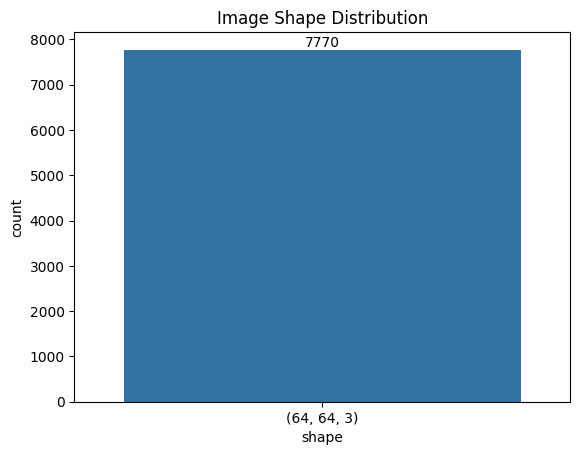

In [38]:
%matplotlib inline
ax = sns.countplot(x="shape",data=df_train)
ax.bar_label(ax.containers[0])
ax.set(title="Image Shape Distribution")

In [31]:
df_test

,name,labels,f_name
0,./data/testClips/00001/,NaN,00001
1,./data/testClips/00002/,NaN,00002
2,./data/testClips/00003/,NaN,00003
3,./data/testClips/00004/,NaN,00004
4,./data/testClips/00005/,NaN,00005
...,...,...,...
3265,./data/testClips/03266/,NaN,03266
3266,./data/testClips/03267/,NaN,03267
3267,./data/testClips/03268/,NaN,03268
3268,./data/testClips/03269/,NaN,03269


In [12]:
mat

{'__header__': b'MATLAB 5.0 MAT-file, Platform: GLNXA64, Created on: Sun Mar 11 13:03:30 2018',
 '__version__': '1.0',
 '__globals__': [],
 'trLb': array([[ 1.],
        [ 1.],
        [ 1.],
        ...,
        [10.],
        [10.],
        [10.]], dtype=float32),
 'valLb': array([[ 1.],
        [ 1.],
        [ 1.],
        ...,
        [10.],
        [10.],
        [10.]], dtype=float32)}

In [14]:
len(mat['trLb'])

7770

In [15]:
df_train

,name,labels,f_name
0,./data/trainClips/03815/,1.0,03815
1,./data/trainClips/07489/,1.0,07489
2,./data/trainClips/03029/,1.0,03029
3,./data/trainClips/04802/,1.0,04802
4,./data/trainClips/06769/,1.0,06769
...,...,...,...
7765,./data/trainClips/03604/,10.0,03604
7766,./data/trainClips/06376/,10.0,06376
7767,./data/trainClips/04421/,10.0,04421
7768,./data/trainClips/00081/,10.0,00081
